In [1]:
import os.path
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_dir = "/Users/mykko/Documents/project/decision/data/videos_images/"
video_name = "video1"
image_name = "00000140.jpg"

In [3]:
image_path = os.path.join(image_dir, video_name, image_name)

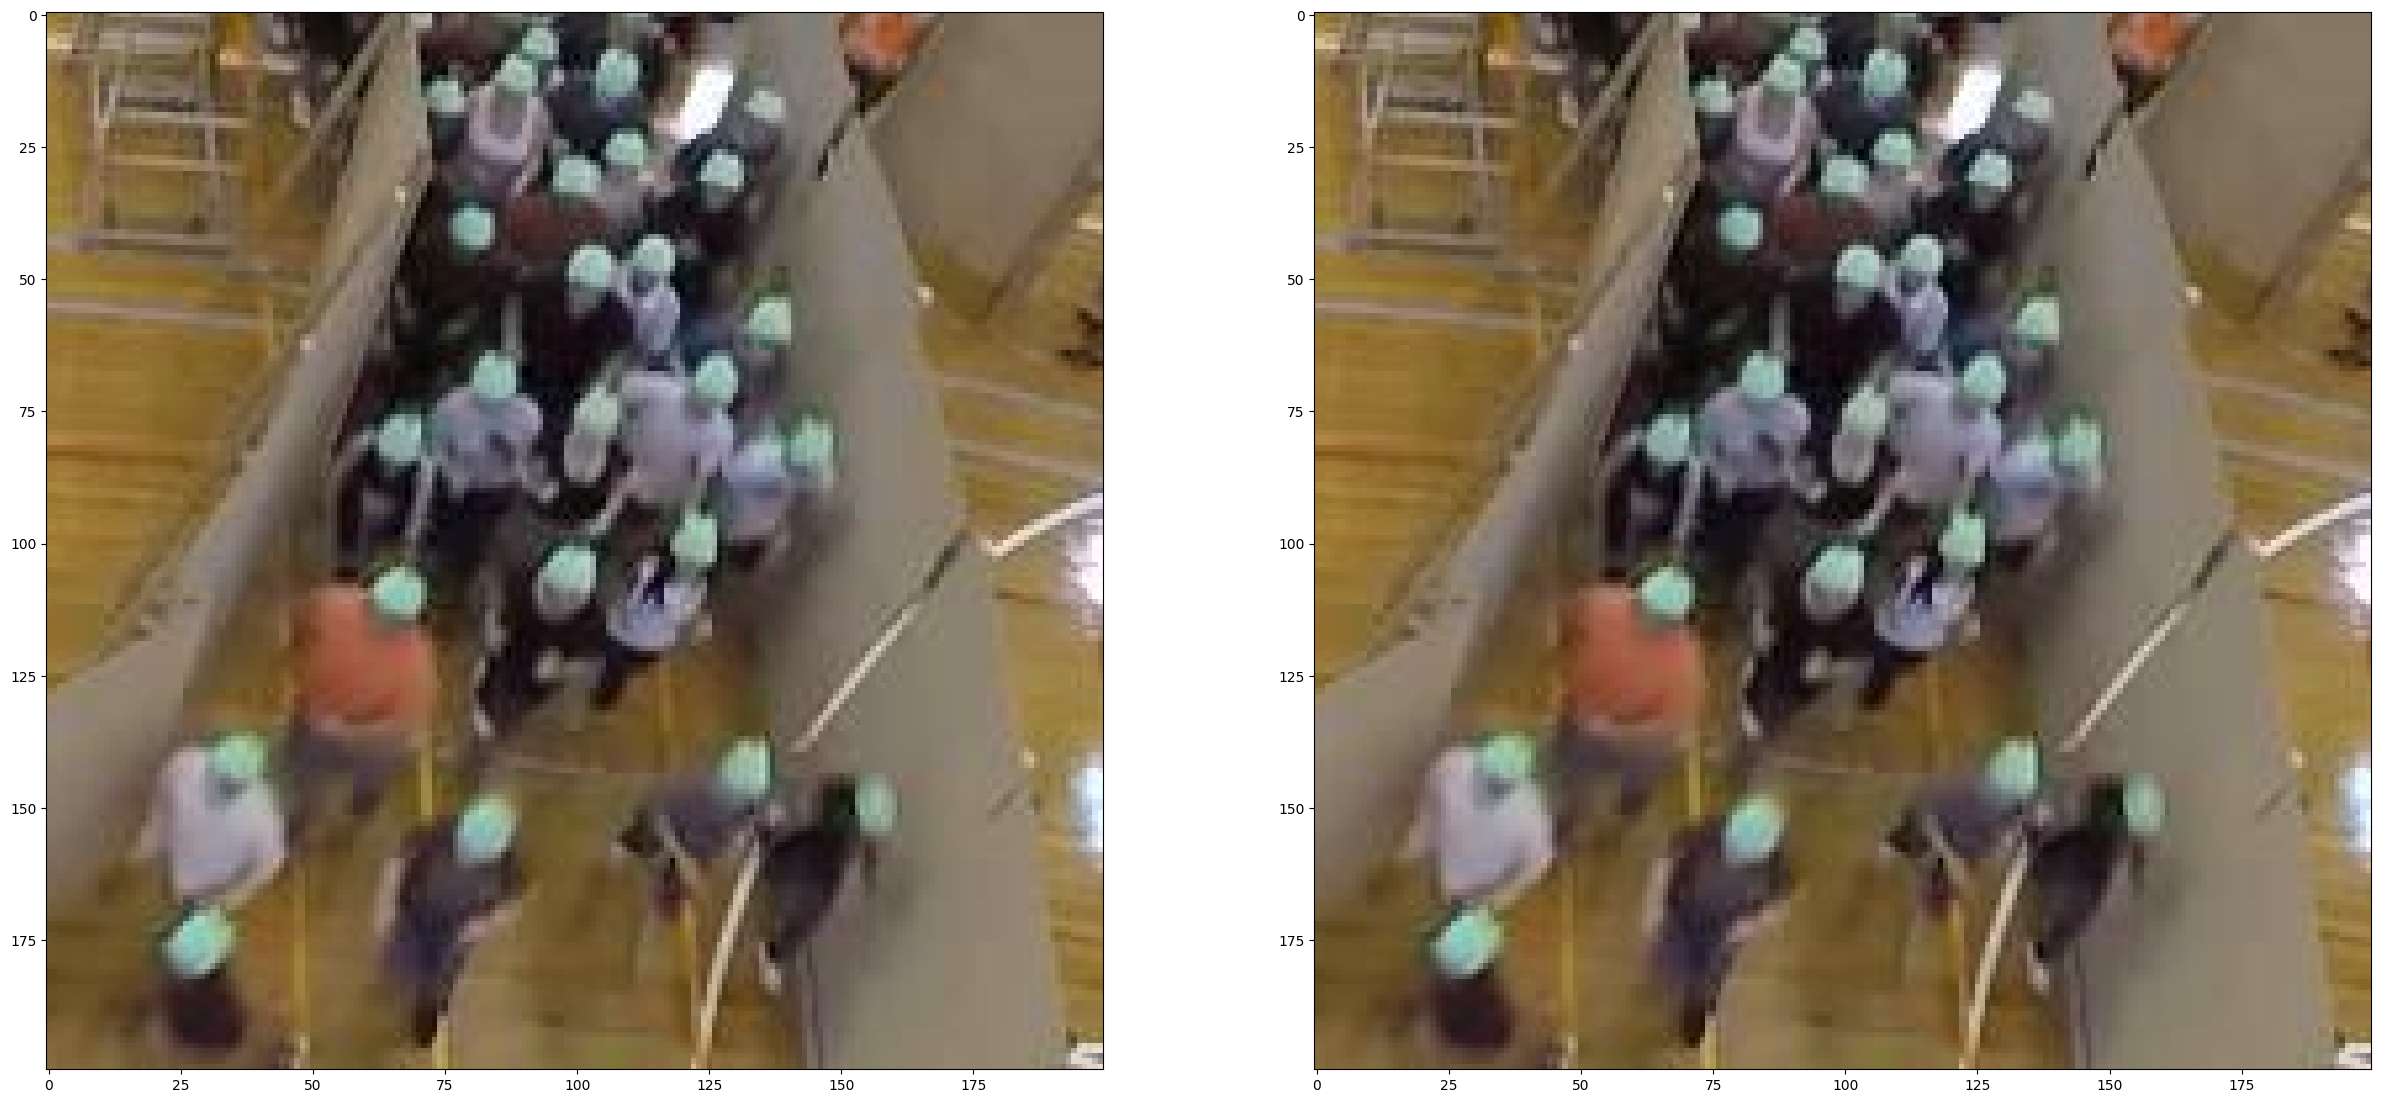

In [10]:
src = cv2.imread(image_path)
src_crop = src[0:200, 550:750]
src = src_crop
f, axes = plt.subplots(1,2, figsize = (30,30))
list = [src[:,:,::-1],src_crop[:,:,::-1]]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i])
    i+=1

In [11]:

HSV = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)


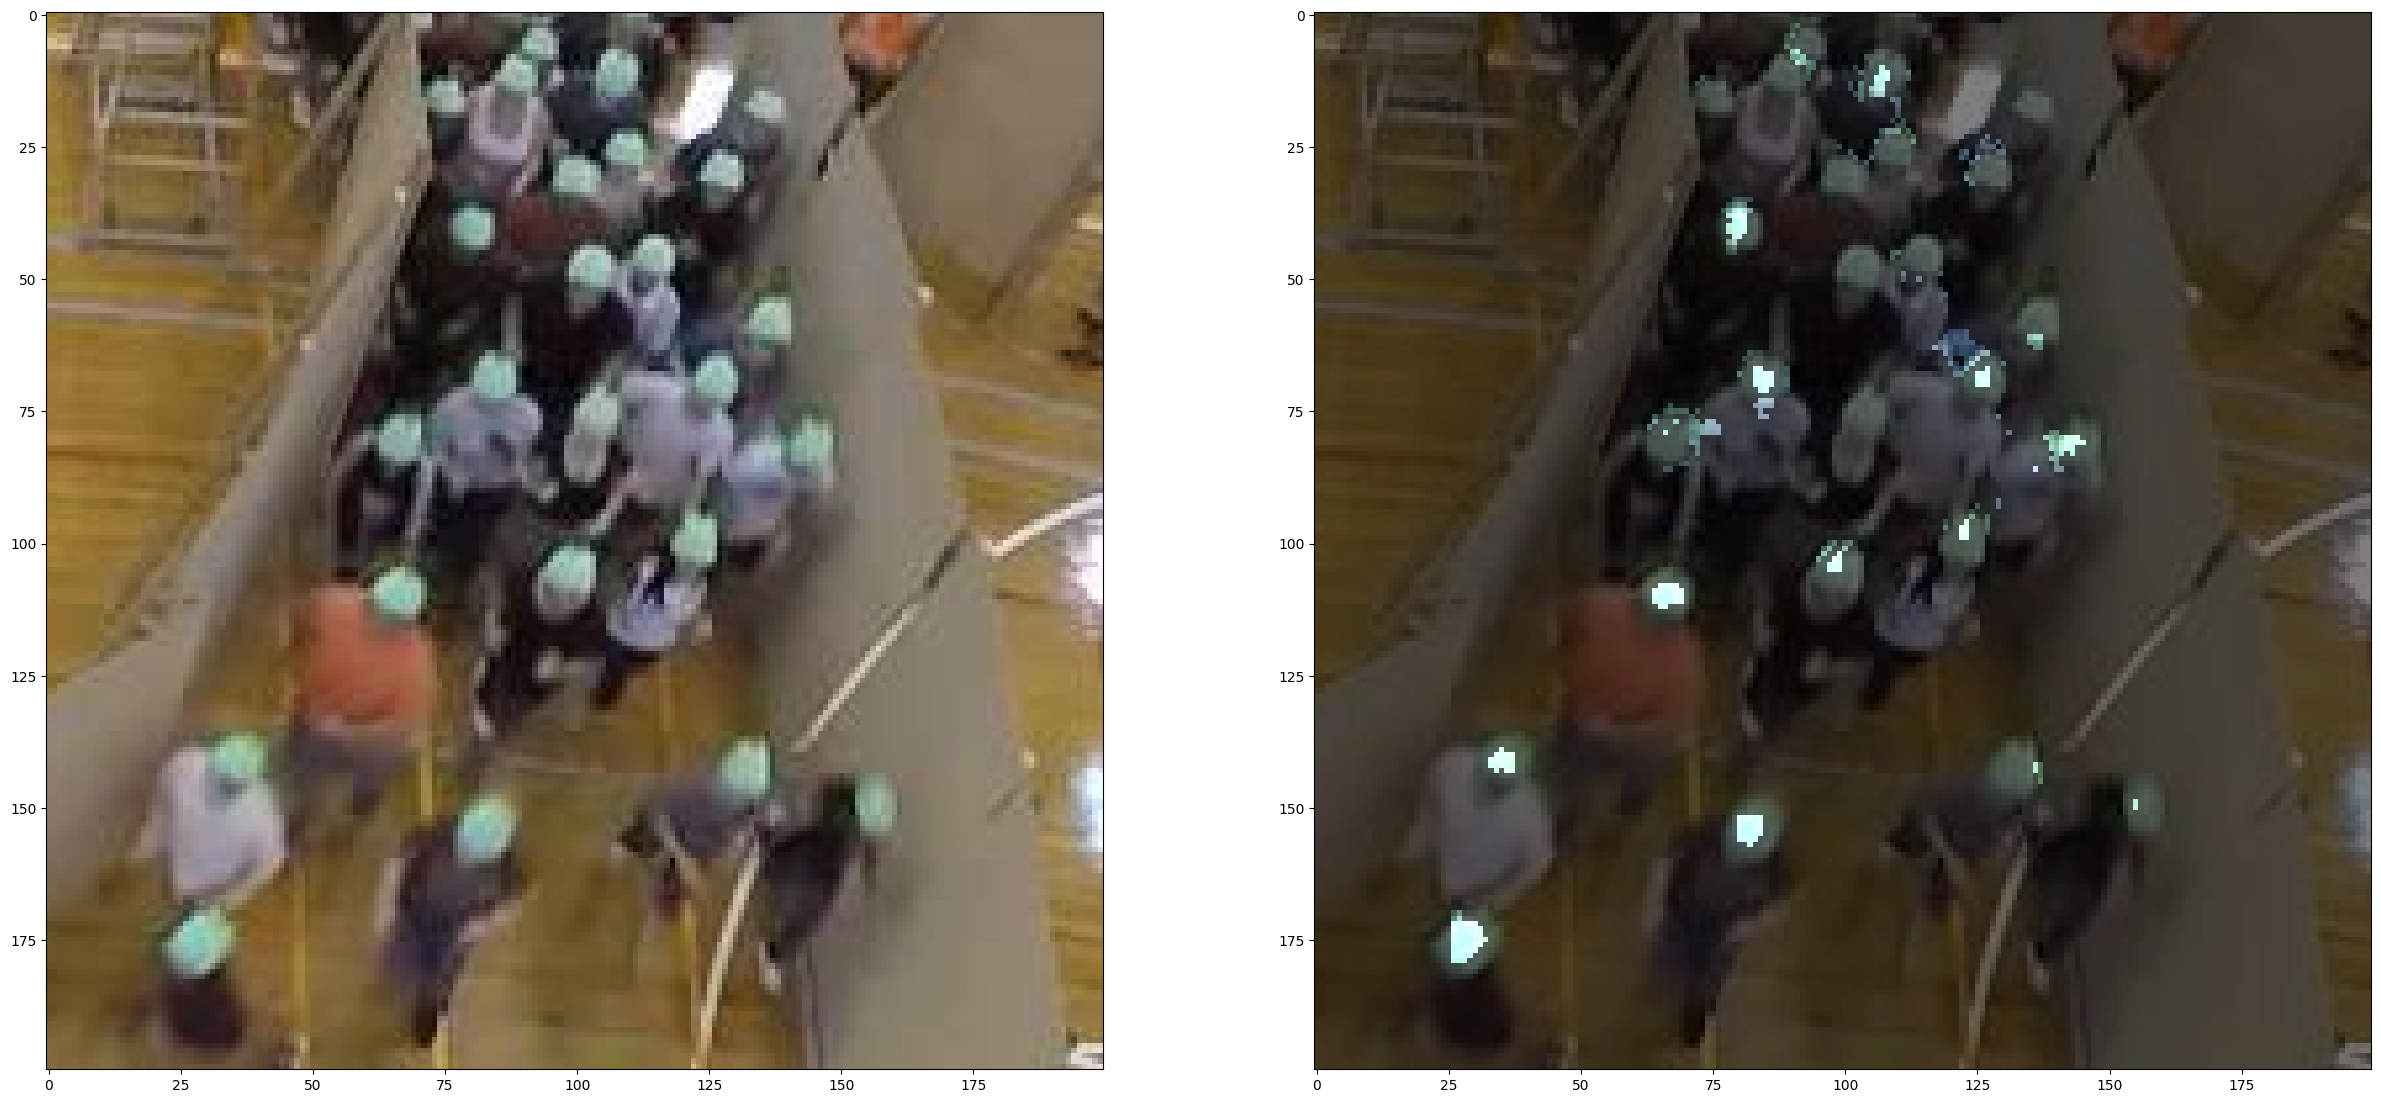

In [12]:
minGreen = np.array([60, 50, 50])
maxGreen = np.array([110, 255, 255])

# 通过掩码控制的按位与运算，锁定蓝色、绿色、红色区域
mask = cv2.inRange(HSV, minGreen, maxGreen)
green = cv2.bitwise_and(src, src, mask=mask)

imgadd1 = cv2.add(src, green)
combine = cv2.addWeighted(src, 0.5, green, 1, 0)


f, axes = plt.subplots(1,2, figsize = (30,30))
list = [src[:,:,::-1],combine[:,:,::-1]]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i])
    i+=1
# 展示各个标记指定的颜色图像

In [7]:
kernel1 = np.ones((3,3), dtype='float32')/9

result_9 = cv2.filter2D(mask, -1,kernel=kernel1)

kernel2 = np.ones((5,5), dtype='float32')/25
src_9 = cv2.filter2D(src, -1,kernel=kernel2)



In [9]:
kernel2 = np.ones((3,3), dtype='float32')/5
kernel2[0][0] = 0
kernel2[0][2] = 0
kernel2[2][0] = 0
kernel2[2][2] = 0

result_5 = cv2.filter2D(mask, -1,kernel=kernel2)

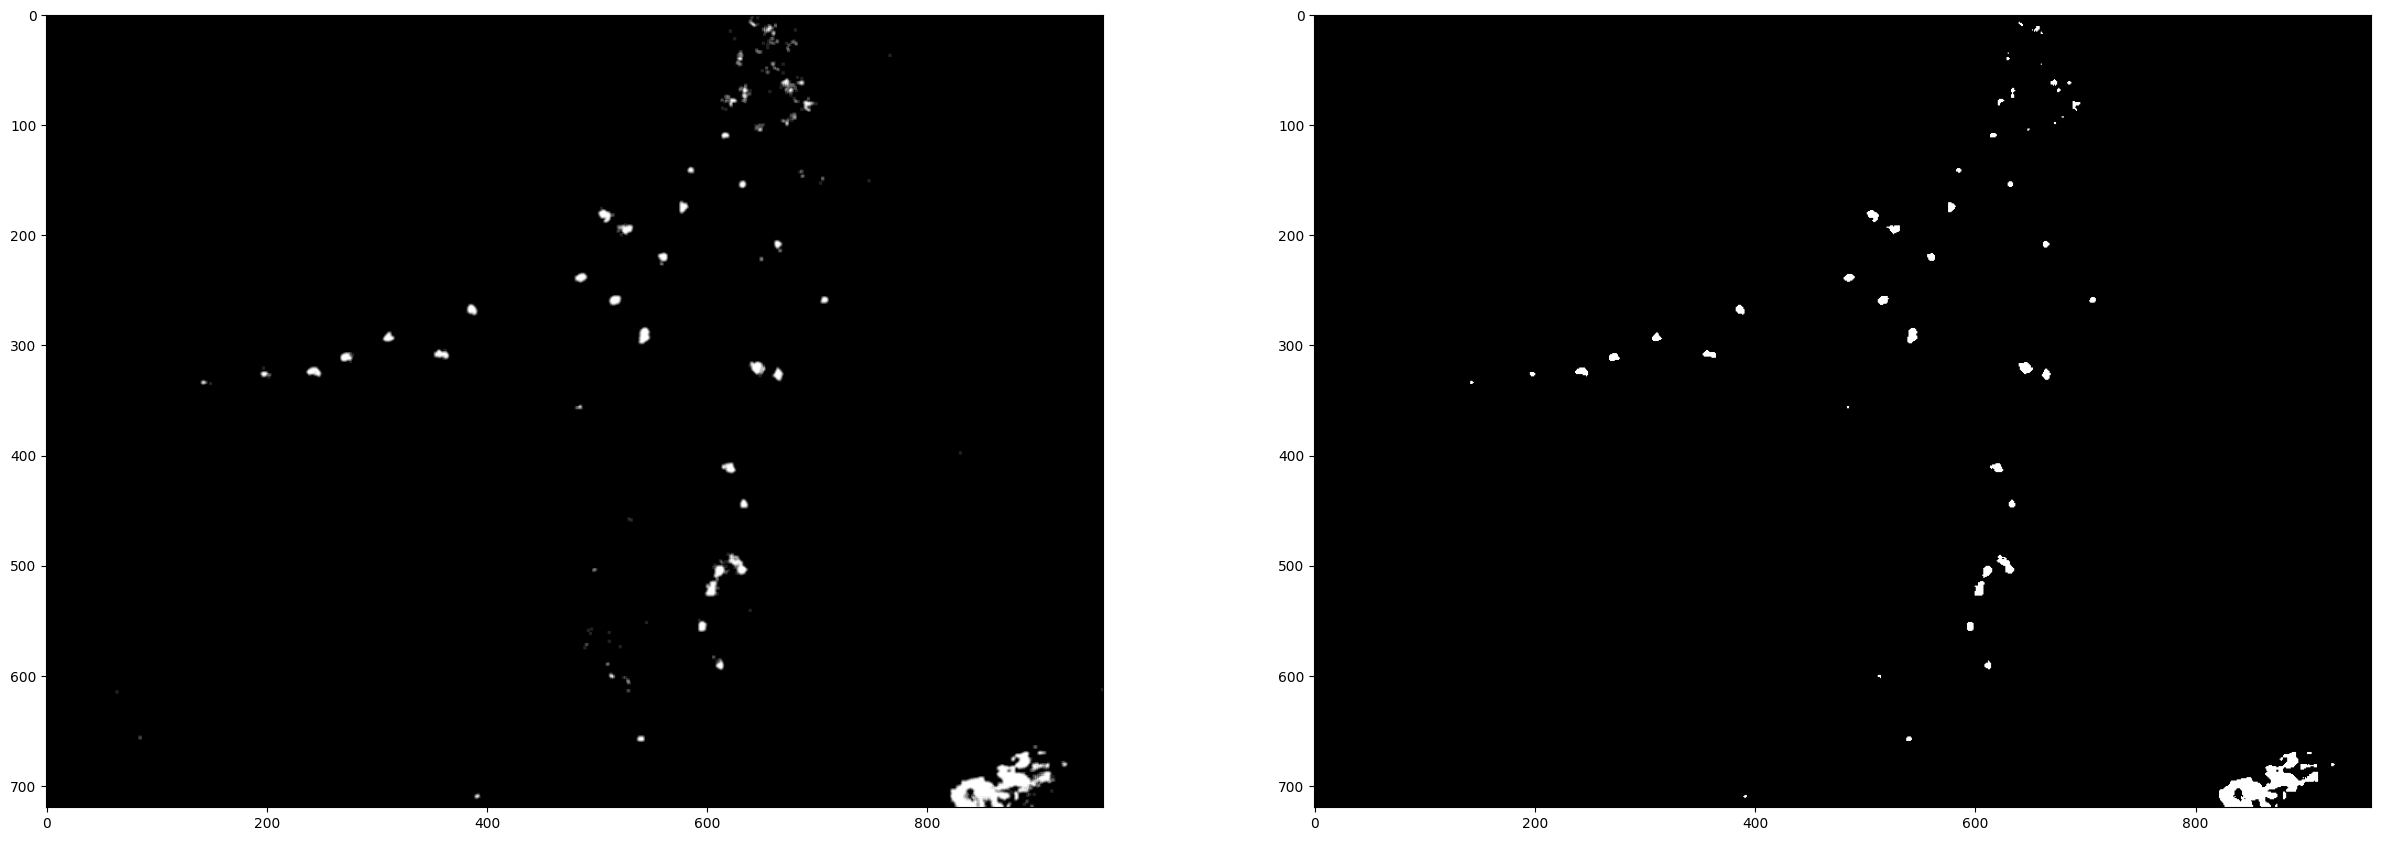

In [10]:
n = 0

ret, result_t_9 = cv2.threshold(result_9, 255.0 * 5 / 9 - 1, 255, cv2.THRESH_BINARY)
ret, result_t_25 = cv2.threshold(result_5, 255.0 * 10 / 25 - 1, 255, cv2.THRESH_BINARY)


f, axes = plt.subplots(1,2, figsize = (30,30))
list = [result_9, result_t_9]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i], cmap="Greys_r")
    i+=1


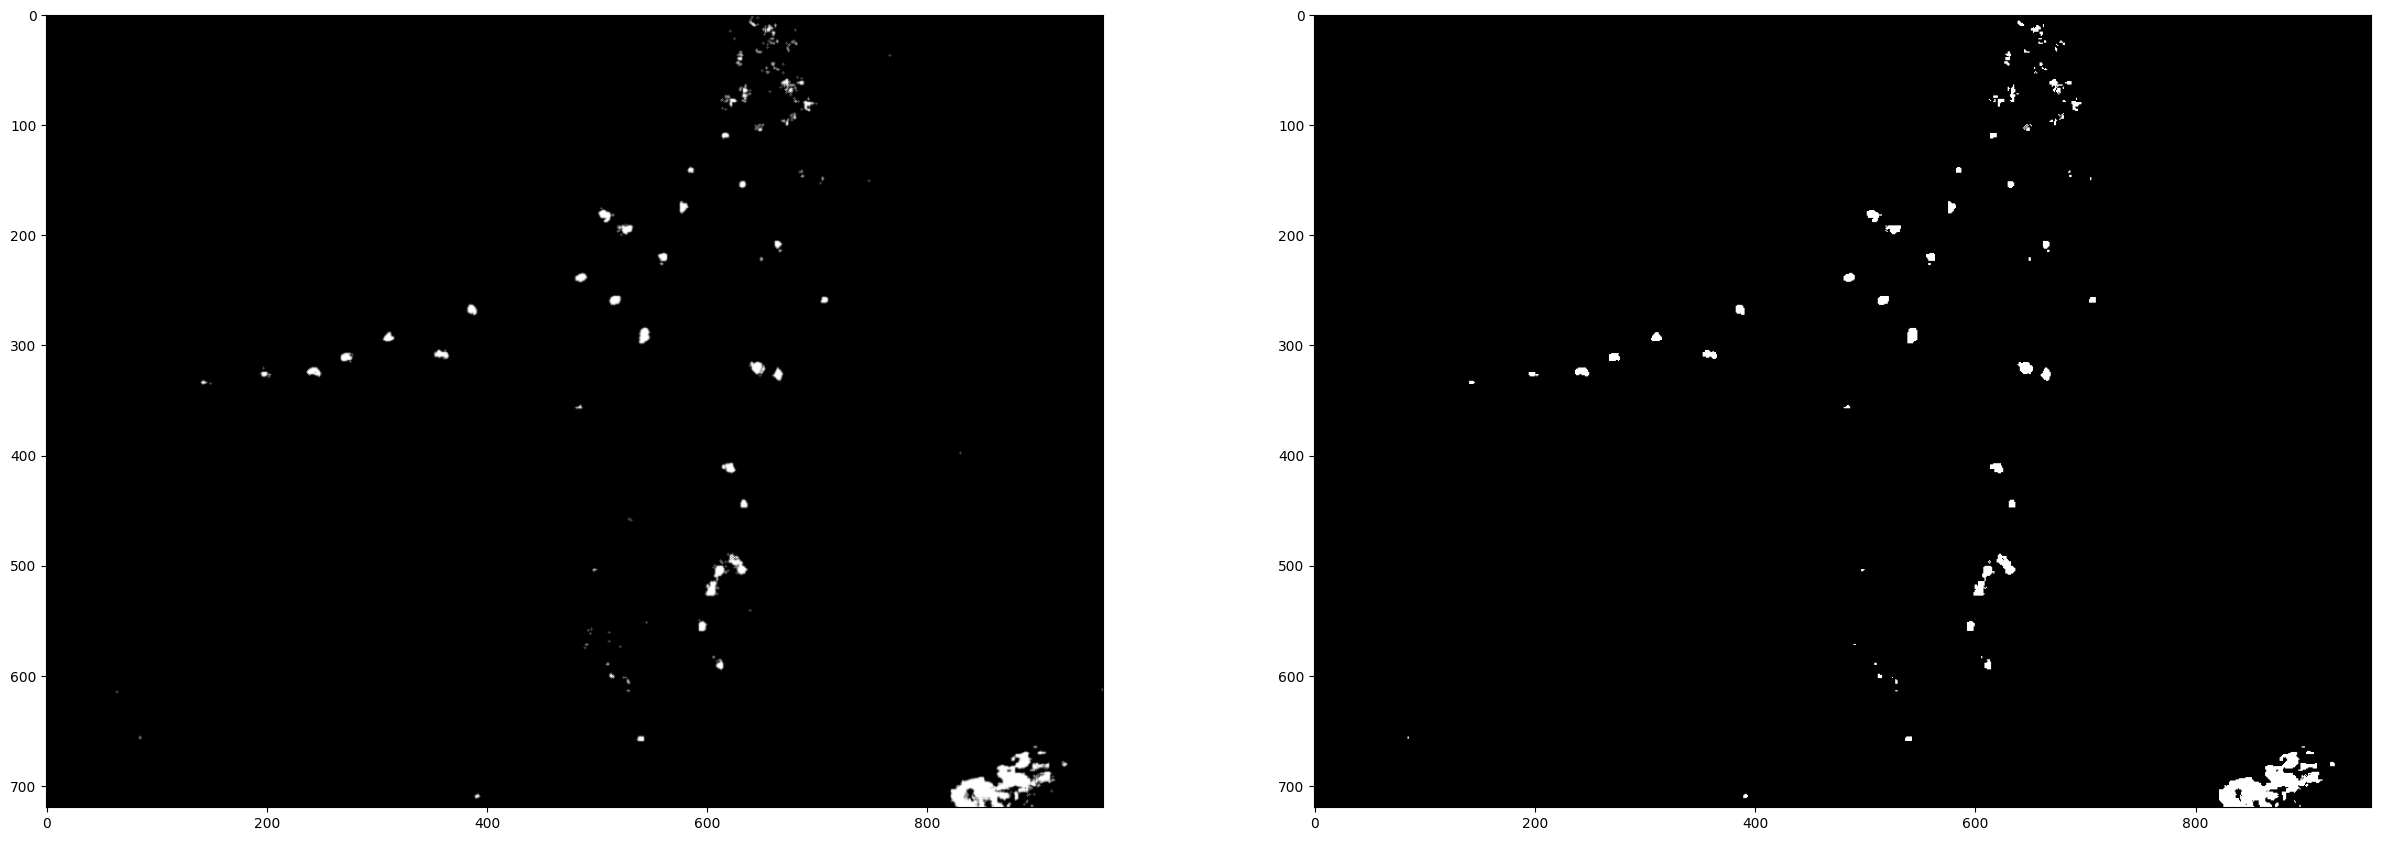

In [11]:
n = 0

ret, result_t_5 = cv2.threshold(result_5, 255.0 * 2 / 5 - 1, 255, cv2.THRESH_BINARY)


f, axes = plt.subplots(1,2, figsize = (30,30))
list = [result_5, result_t_5]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i], cmap="Greys_r")
    i+=1


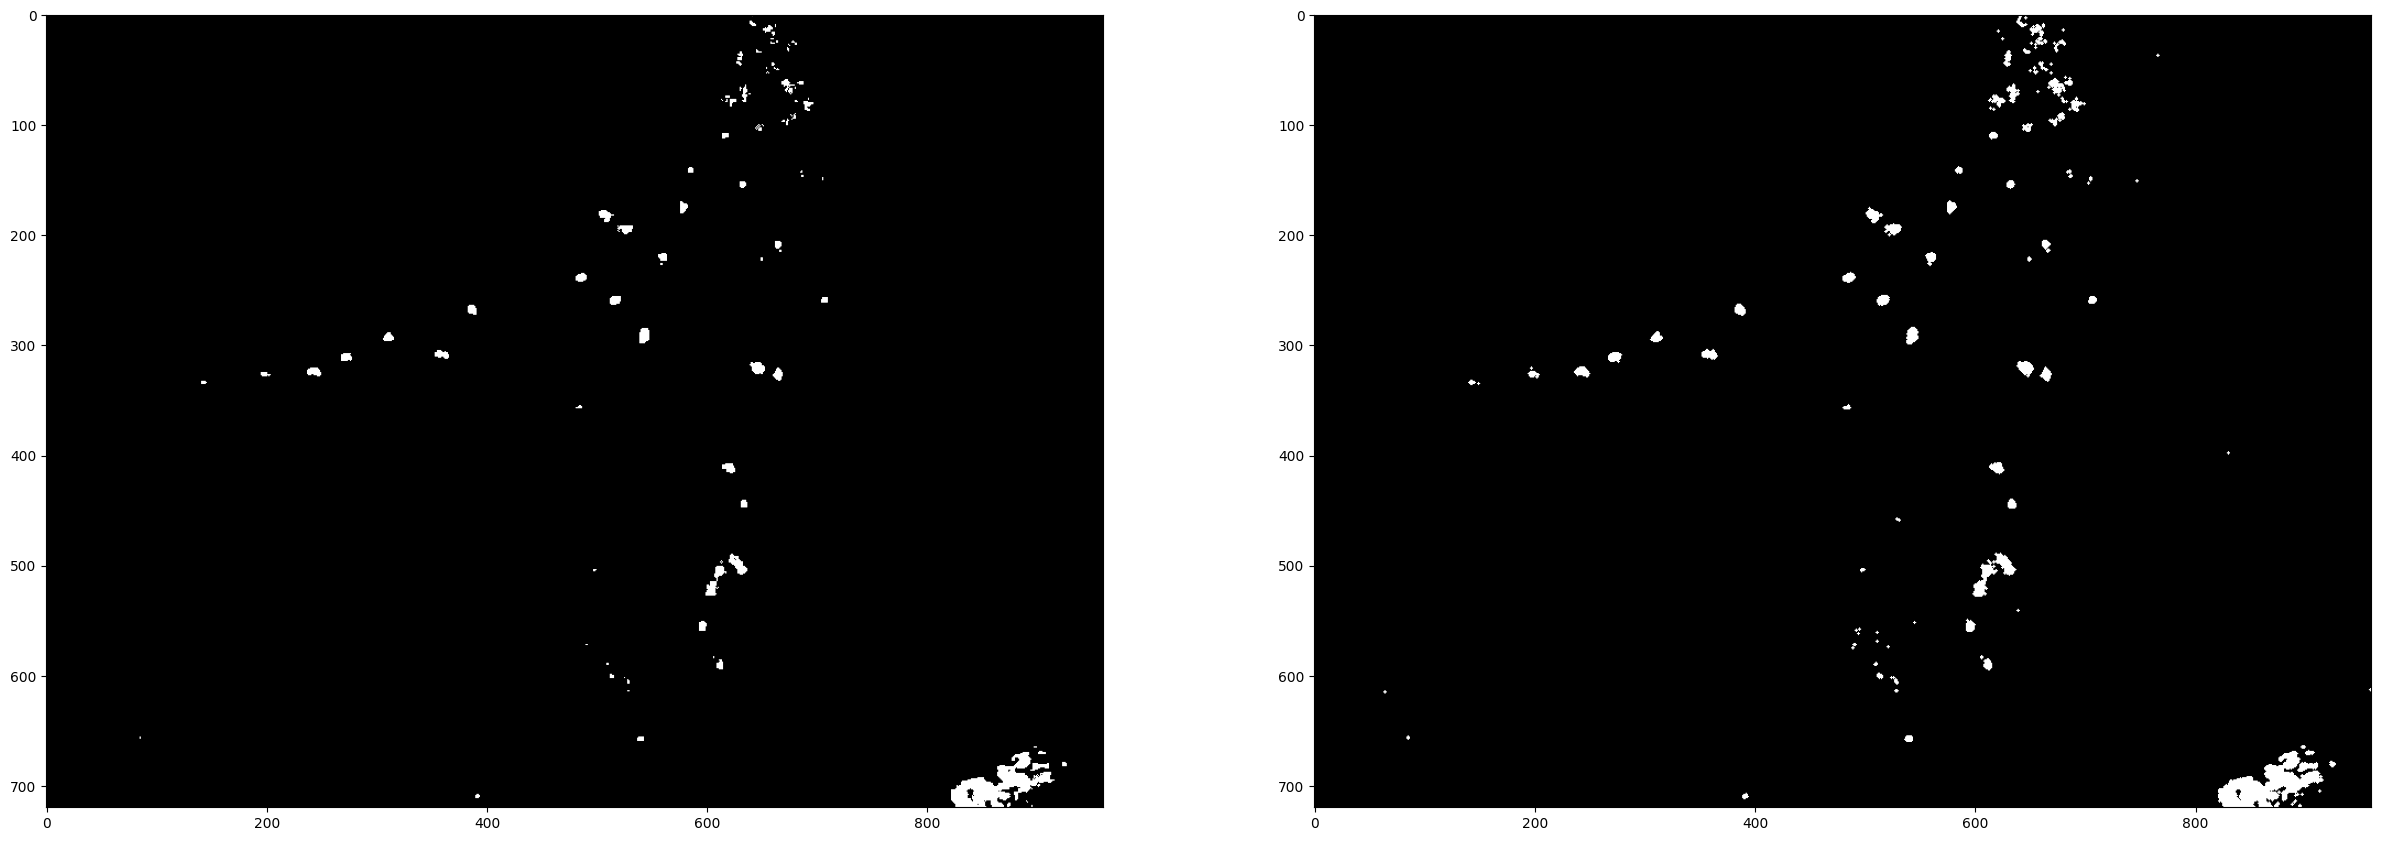

In [12]:
n = 0

ret, result_t_1 = cv2.threshold(result_5, 1, 255, cv2.THRESH_BINARY)


f, axes = plt.subplots(1,2, figsize = (30,30))
list = [result_t_5, result_t_1]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i], cmap="Greys_r")
    i+=1


In [13]:
from typing import List

def check(value):
    return value == 1

def dfs(grid, r, c, land):
    land.append((r,c))
    grid[r][c] = 0
    nr, nc = len(grid), len(grid[0])
    for x, y in [(r - 1, c), (r + 1, c), (r, c - 1), (r, c + 1)]:
        if 0 <= x < nr and 0 <= y < nc and check(grid[x][y]):
            dfs(grid, x, y, land)

def numIslands(grid: List[List[str]]):
    nr = len(grid)
    if nr == 0:
        return 0
    nc = len(grid[0])

    num_islands = 0

    lands = []
    for r in range(nr):
        for c in range(nc):
            if check(grid[r][c]):
                num_islands += 1
                land = []
                dfs(grid, r, c, land)
                lands.append(land)
    print(len(lands), num_islands)
    return num_islands, lands


125 125
47


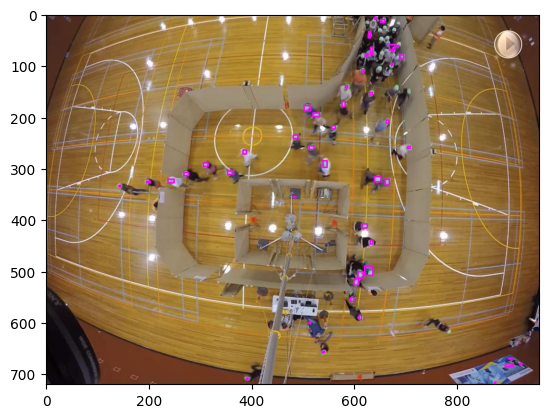

In [14]:
grid = result_t_5 // 255
_, lands = numIslands(grid)

l = len(lands)

for i in range(l - 1, -1, -1):
    if len(lands[i]) < 10 or len(lands[i]) > 500:
        lands.pop(i)
print(len(lands))

pos_lands = []
for land in lands:
    min_x = min(land, key = lambda x : x[0])[0]
    min_y = min(land, key = lambda x : x[1])[1]
    max_x = max(land, key = lambda x : x[0])[0]
    max_y = max(land, key = lambda x : x[1])[1]
    pos_lands.append((min_x, min_y, max_x, max_y))
    # print(pos_lands[-1])
picture = src.copy()
for (min_x, min_y, max_x, max_y) in pos_lands:
    cv2.rectangle(picture, (min_y, min_x), (max_y, max_x), (255, 0, 255), 2)
plt.imshow(picture[:,:,::-1])